### Contents
Introduction<br>
The ML Process<br>
Prepare for Training<br>
&emsp;Collect the Data<br>
&emsp;Explore the Data<br>
&emsp;Understand the Problem<br>
&emsp;Design the Model<br>
Training the Model<br>
&emsp;Initialize the Parameters<br>
&emsp;Make a Prediction<br>
&emsp;Calculate the Loss<br>
&emsp;Calculate a Step<br>
&emsp;Optimize the Parameters<br>
Putting it All Together<br>
A Quadratic Example<br>

In [181]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Introduction

In [182]:
def create_linear_data(file_name: str) -> tuple[list[int], list[int]]:
    X = [float(x) for x in range(-10, 10)]
    y = [5*x+9 for x in X]
    df = pd.DataFrame(list(zip(X, y)), columns= ['input', 'output'])
    df.to_csv(file_name)
    return np.array(X), np.array(y)

X, y = create_linear_data('linear_data.csv')
print(X)
print(y)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
[-41. -36. -31. -26. -21. -16. -11.  -6.  -1.   4.   9.  14.  19.  24.
  29.  34.  39.  44.  49.  54.]


### Collecting the Data

In [183]:
def load_data(file_name: str) -> tuple:
    df = pd.read_csv(file_name)
    X = df['input'].to_numpy()
    y = df['output'].to_numpy()
    return X, y

X, y = load_data('linear_data.csv')

print('X Dimenstions:',X.ndim)
print('X Shape:', X.shape)
print(X)

print('y Dimenstions:',y.ndim)
print('y Shape:', y.shape)
print(y)

X Dimenstions: 1
X Shape: (20,)
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
y Dimenstions: 1
y Shape: (20,)
[-41. -36. -31. -26. -21. -16. -11.  -6.  -1.   4.   9.  14.  19.  24.
  29.  34.  39.  44.  49.  54.]


### Exploring the Data

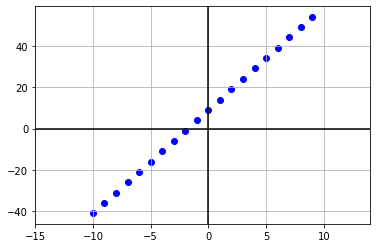

In [184]:
def plot_data(x: np.ndarray, y1: np.ndarray, y2: np.ndarray=None) -> None:
    ax = plt.subplots()[1]
    ax.set_xlim(x.min()-5, x.max()+5)
    ax.set_ylim(y1.min()-5, y1.max()+5)
    plt.scatter(x, y1, color='blue')
    if not y2 is None:
        ax.scatter(x, y2, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')

plot_data(X, y)

### Design the Model

In [185]:
def linear_equation(x: Tensor, params: Tensor) -> Tensor:
    m, b = params
    return m*x + b

The next cell is a quick test of our linear equation function.

In [186]:
y_sample = linear_equation(torch.tensor(X), torch.tensor((5, 9)))

print('y_sample Dimenstions:',y.ndim)
print('y_sample Shape:', y.shape)
print(y_sample)


y_sample Dimenstions: 1
y_sample Shape: (20,)
tensor([-41., -36., -31., -26., -21., -16., -11.,  -6.,  -1.,   4.,   9.,  14.,
         19.,  24.,  29.,  34.,  39.,  44.,  49.,  54.], dtype=torch.float64)


### Initialize parameters

In [187]:
params = torch.ones(2).requires_grad_()

print('params Dimenstions:',params.ndim)
print('params Shape:', params.shape)
print(params)


params Dimenstions: 1
params Shape: torch.Size([2])
tensor([1., 1.], requires_grad=True)


### Create Tensors

In [188]:
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

# If you try to use the tensor function in the torch module you will get a UserWarning
# because Pytorch wants you to use from_numpy for efficiency.
#X_train = torch.tensor(X, dtype=torch.float64, requires_grad=True)
#y_train = torch.tensor(y, dtype=torch.float64)

print('X_train Dimensions:', X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train)

print('\ny_train Dimensions:', y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train)

X_train Dimensions: 1
X_train Shape: torch.Size([20])
tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.], dtype=torch.float64)

y_train Dimensions: 1
y_train Shape: torch.Size([20])
tensor([-41., -36., -31., -26., -21., -16., -11.,  -6.,  -1.,   4.,   9.,  14.,
         19.,  24.,  29.,  34.,  39.,  44.,  49.,  54.], dtype=torch.float64)


### Making a Prediction

predictions Dimensions: 1
predictions Shape: torch.Size([20])
tensor([-9., -8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float64,
       grad_fn=<AddBackward0>)


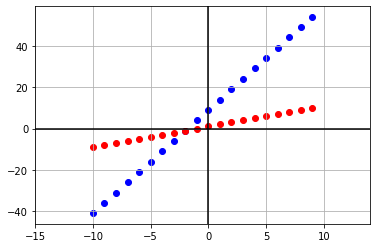

In [189]:
predictions = linear_equation(X_train, params)

print('predictions Dimensions:', predictions.ndim)
print('predictions Shape:', predictions.shape)
print(predictions)

plot_data(X_train.numpy(), y_train.numpy(), predictions.detach().numpy())

### Calculate the Loss

In [190]:

def mse(predictions: Tensor, labels: Tensor) -> Tensor:
    return ((predictions-labels)**2).mean().sqrt()

loss = mse(predictions, y_train)

print('loss Dimensions:', loss.ndim)
print('loss Shape:', loss.shape)
print(loss)

loss Dimensions: 0
loss Shape: torch.Size([])
tensor(23.8328, dtype=torch.float64, grad_fn=<SqrtBackward0>)


### Exploring the loss function

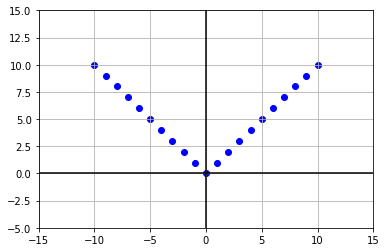

In [191]:
x = np.array([x for x in range(-10, 11)])
losses = [mse(torch.tensor(x, dtype=torch.float64), torch.tensor(0, dtype=torch.float64)) for x in range(-10, 11)]

# This will not work because at least one of the values needs to be a tensor so that the mean method of 
# the tensor object can be found within the mse function.
#losses = [mse(x, 0) for x in range(-10, 11)]

# We cannot do this because we want a loss for every value in x. 
# We do not want a single scalar value.
#losses = mse(torch.from_numpy(x), torch.zeros(21))

plot_data(np.array(x), np.array(losses))

In [192]:
y

array([-41., -36., -31., -26., -21., -16., -11.,  -6.,  -1.,   4.,   9.,
        14.,  19.,  24.,  29.,  34.,  39.,  44.,  49.,  54.])

### Calculate a Step

In [193]:
loss.backward()
lr = 1e-1   # This is 0.1
step = lr * params.grad.data

print('Gradient Dimensions:', params.grad.ndim)
print('Gradient Shape:', params.grad.shape)
print(params.grad)

print('\nStep Dimensions:', step.ndim)
print('Step Shape:', step.shape)
print(step)

Gradient Dimenstions: 1
Gradient Shape: torch.Size([2])
tensor([-5.4547, -0.2518])

Step Dimenstions: 1
Step Shape: torch.Size([2])
tensor([-0.5455, -0.0252])


### Optimize the Parameters

In [194]:
params.data -= step
params.grad = None

print('params Dimensions:', params.ndim)
print('params Shape:', params.shape)
print(params)

params Dimenstions: 1
params Shape: torch.Size([2])
tensor([1.5455, 1.0252], requires_grad=True)


### Putting it all together

In [195]:
# Load the Data.
X, y = load_data('linear_data.csv')

# Create Tensors - X requires gradients
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

# Initialize parameters
params = torch.ones(2).requires_grad_()

# Epoch and Learning rate
epochs = 5
lr = 1e-1

print(X_train)
print(y_train)

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.], dtype=torch.float64)
tensor([-41., -36., -31., -26., -21., -16., -11.,  -6.,  -1.,   4.,   9.,  14.,
         19.,  24.,  29.,  34.,  39.,  44.,  49.,  54.], dtype=torch.float64)


Epoch: 1  Loss: 23.83275057562597 Grad: tensor([-5.4547, -0.2518]) Step: tensor([-0.5455, -0.0252]) Parameters: tensor([1.5455, 1.0252]).
Epoch: 2  Loss: 20.87655581171541 Grad: tensor([-5.3524, -0.2993]) Step: tensor([-0.5352, -0.0299]) Parameters: tensor([2.0807, 1.0551]).
Epoch: 3  Loss: 18.039514929090718 Grad: tensor([-5.2010, -0.3595]) Step: tensor([-0.5201, -0.0360]) Parameters: tensor([2.6008, 1.0911]).
Epoch: 4  Loss: 15.375512192975222 Grad: tensor([-4.9701, -0.4364]) Step: tensor([-0.4970, -0.0436]) Parameters: tensor([3.0978, 1.1347]).
Epoch: 5  Loss: 12.965887597591209 Grad: tensor([-4.6114, -0.5333]) Step: tensor([-0.4611, -0.0533]) Parameters: tensor([3.5590, 1.1880]).
Loss: 12.965887597591209 Parameters: tensor([3.5590, 1.1880])


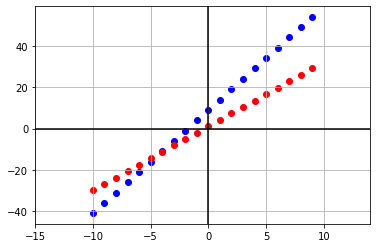

In [196]:
def train(epochs: int, X_train: Tensor, y_train: Tensor, verbose: bool) -> tuple:
    # Initialize parameters.
    params = torch.ones(2).requires_grad_()

    # Training loop
    for epoch in range(epochs):
        predictions = linear_equation(X_train, params)
        loss = mse(predictions, y_train)
        loss.backward()
        step = lr * params.grad.data
        params.data -= step
        if verbose:
            print(f'Epoch: {epoch+1}  Loss: {loss.item()} Grad: {params.grad.data} Step: {step} Parameters: {params.data}.')

        params.grad = None

    return predictions, loss, params


predictions, loss, params = train(epochs, X_train, y_train, True)
print(f'Loss: {loss.item()} Parameters: {params.data}')

plot_data(X_train.numpy(), y_train.numpy(), predictions.detach().numpy())

### A Quadratic Example

In [197]:
def create_quadratic_data(file_name: str) -> tuple[list[int], list[int]]:
    X = [float(x) for x in range(-10, 11)]
    y = [5*(x**2)+(2*x)+3 for x in X]
    df = pd.DataFrame(list(zip(X, y)), columns= ['input', 'output'])
    df.to_csv(file_name)
    return X, y

X, y = create_quadratic_data('quadratic_data.csv')
print(X)
print(y)

[-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[483.0, 390.0, 307.0, 234.0, 171.0, 118.0, 75.0, 42.0, 19.0, 6.0, 3.0, 10.0, 27.0, 54.0, 91.0, 138.0, 195.0, 262.0, 339.0, 426.0, 523.0]


In [198]:
X, y = load_data('quadratic_data.csv')

print(X)
print(y)
print(type(X))
print(type(y))

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[483. 390. 307. 234. 171. 118.  75.  42.  19.   6.   3.  10.  27.  54.
  91. 138. 195. 262. 339. 426. 523.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


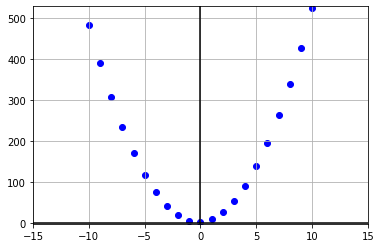

In [199]:
plot_data(X, y)

In [200]:
def quadratic_equation(x: Tensor, abc: tuple[int]) -> Tensor:
    a, b, c = abc
    y = a*(x**2) + (b*x) + c
    return y

y = quadratic_equation(X, (5, 2, 3))

y

array([483., 390., 307., 234., 171., 118.,  75.,  42.,  19.,   6.,   3.,
        10.,  27.,  54.,  91., 138., 195., 262., 339., 426., 523.])

In [201]:
X_train = torch.from_numpy(X)
X_train.requires_grad_(True)
y_train = torch.from_numpy(y)
epochs = 200
lr = 1e-1

print(X_train)
print(y_train)

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       dtype=torch.float64, requires_grad=True)
tensor([483., 390., 307., 234., 171., 118.,  75.,  42.,  19.,   6.,   3.,  10.,
         27.,  54.,  91., 138., 195., 262., 339., 426., 523.],
       dtype=torch.float64)


Loss: 58.38729323288551 Parameters: tensor([1.3038, 1.9999, 1.1959])


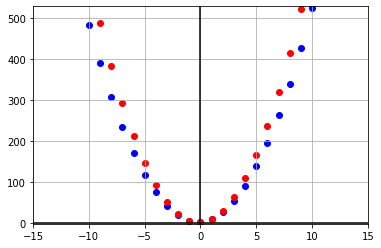

In [202]:
def train(epochs: int, X_train: Tensor, y_train: Tensor, verbose: bool) -> tuple:
    # Initialize parameters.
    params = torch.ones(3).requires_grad_()

    # Training Loop
    for epoch in range(epochs):
        predictions = quadratic_equation(X_train, params)
        loss = mse(predictions, y_train)
        loss.backward()
        step = lr * params.grad.data
        params.data -= step
        if verbose:
            print(f'Epoch: {epoch+1}  Loss: {loss.item()} Grad: {params.grad.data} Step: {step} Parameters: {params.data}.')

        params.grad = None

    return predictions, loss, params


predictions, loss, params = train(epochs, X_train, y_train, False)
print(f'Loss: {loss.item()} Parameters: {params.data}')

plot_data(X_train.detach().numpy(), y_train.detach().numpy(), predictions.detach().numpy())